# Data Mining (Δ02): Exercise Set 2: 2.2 - 5Gaussians Dataset (K-Means - Silhouette)

<br>Name: Nefeli Eleftheria Sextou</br> 
<br> Student ID: 503</br> 
<br> E-mail: pcs00503@uoi.gr, nsekstou@cs.uoi.gr</br>

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#classifiers
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\5gaussians.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])

In [3]:
#range of k values to test
k = range(2, 11)

silhouette_scores = []

# get silhouette for each different k
for k_i in k:
    kmeans = KMeans(n_clusters=k_i, random_state=42)
    labels = kmeans.fit_predict(main_df)
    silhouette_avg = silhouette_score(main_df, labels)
    silhouette_scores.append(silhouette_avg)
    print("k = {} ----- Silhouette Score = {}".format(k_i,silhouette_avg))

# get best k (highest silhouette score)
best_k = k[np.argmax(silhouette_scores)]
print("Optimal number of clusters: {}".format(best_k))

k = 2 ----- Silhouette Score = 0.6523375435867358
k = 3 ----- Silhouette Score = 0.6869652460106295
k = 4 ----- Silhouette Score = 0.686649762315691
k = 5 ----- Silhouette Score = 0.755177042673792
k = 6 ----- Silhouette Score = 0.6967303356393834
k = 7 ----- Silhouette Score = 0.6438209904801687
k = 8 ----- Silhouette Score = 0.5494608931090416
k = 9 ----- Silhouette Score = 0.5497674354099501
k = 10 ----- Silhouette Score = 0.43233201369772717
Optimal number of clusters: 5


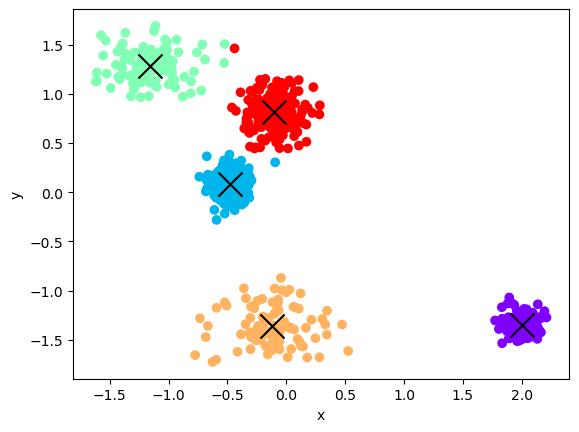

In [4]:
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(main_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The optimal number of clusters matches the number of clusters expected from visual inspection of the data.